In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [2]:
sns.set_style('darkgrid')
%matplotlib inline

# Dataset

In [3]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv',
                index_col="Month",
                 parse_dates=True
                )

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


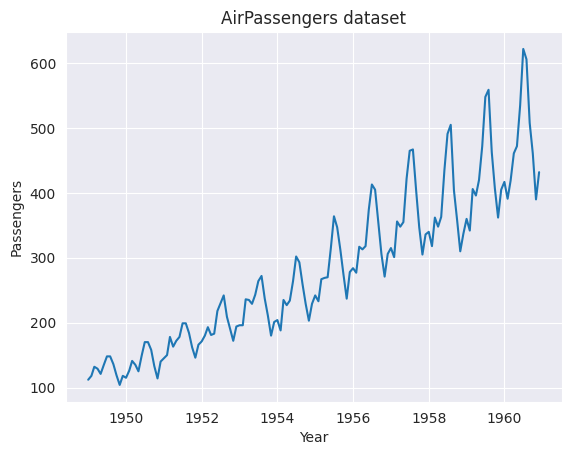

In [7]:
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('AirPassengers dataset')
plt.show()

# Time Series Analysis

#### Decomposing the Trend, Seasonality and The noise:

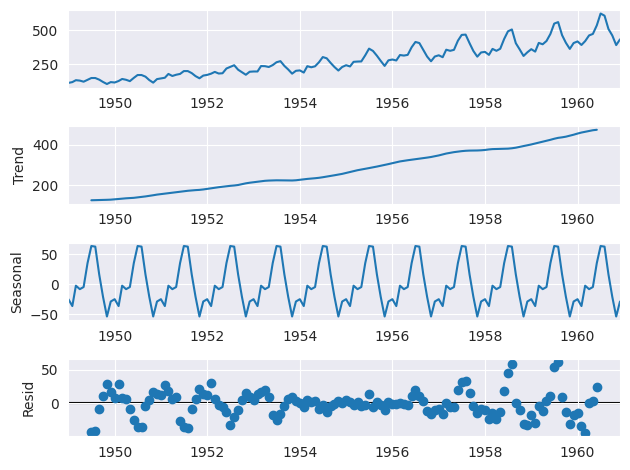

In [8]:
decomp = seasonal_decompose(df, model='additive') # Y = T + S + R
# decomp = seasonal_decompose(df, model='multiplicative') # Y = T * S * R
decomp.plot()
plt.show()

#### rolling mean of the time series:

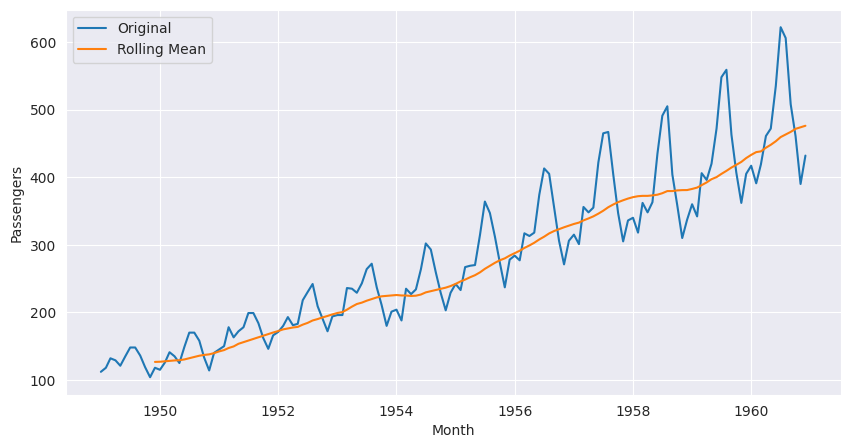

In [9]:
# Compute the 
rolling_mean = df.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y='Passengers', ax=ax, label='Original')
sns.lineplot(data=rolling_mean, x=rolling_mean.index, y='Passengers', ax=ax, label='Rolling Mean')
plt.show()


#### autocorrelation and partial autocorrelation plots:

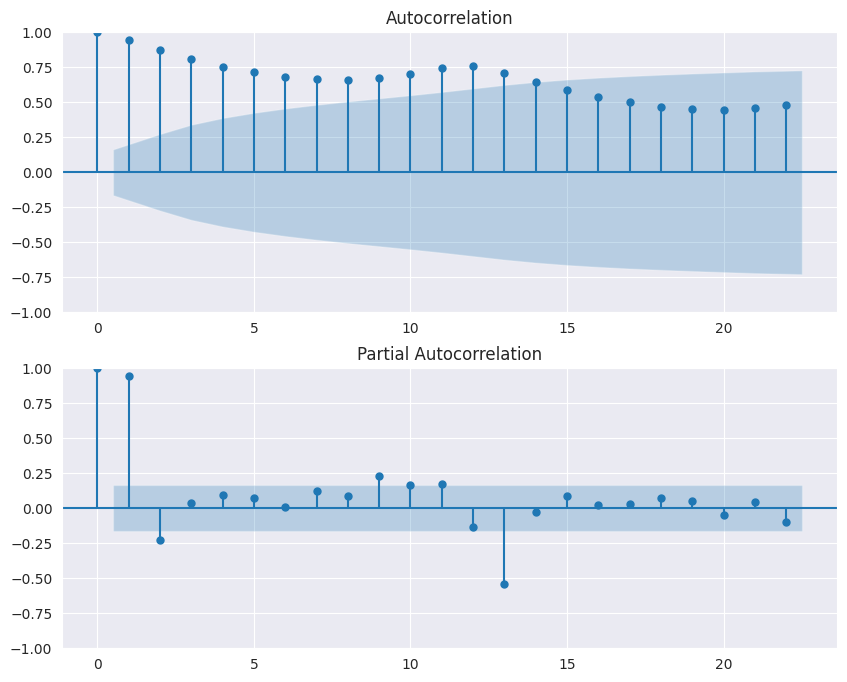

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 8))
plot_acf(df, ax=ax[0])
plot_pacf(df, ax=ax[1],method='ywm')
plt.show()

## Building Model to make predictions

In [11]:
model = ARIMA(df, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

/home/satz/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/satz/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/satz/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
# preds for next decade
preds = model.predict(start=df.index[-1], end=df.index[-1] + pd.DateOffset(years=10), typ='levels')

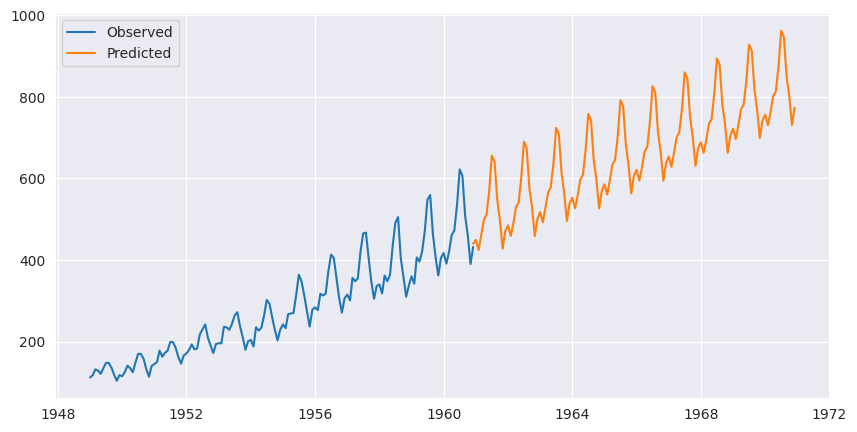

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Passengers'], label='Observed')
plt.plot(preds.index, preds, label='Predicted')
plt.legend()
plt.show()